<a href="https://colab.research.google.com/github/fahr-khadija/Breast-Cancer-ML/blob/main/breast_cancer_Yo_Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_absolute_error
from google.colab import files

# Needed to show plots inline for notebooks
%matplotlib inline

In [39]:
data=files.upload()

Saving breast_cancer_data_load.csv to breast_cancer_data_load.csv


Split the Data into Training and Testing Sets
Step 1: Read the lending_data.csv data from the Resources folder into a Pandas DataFrame.

In [43]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
breast_cancer_pd = pd.read_csv('breast_cancer_data_load.csv')
# Review the DataFrame
breast_cancer_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [44]:
breast_cancer_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              350 non-null    float64
 1   mean texture             350 non-null    float64
 2   mean perimeter           350 non-null    float64
 3   mean area                350 non-null    float64
 4   mean smoothness          350 non-null    float64
 5   mean compactness         350 non-null    float64
 6   mean concavity           350 non-null    float64
 7   mean concave points      350 non-null    float64
 8   mean symmetry            350 non-null    float64
 9   mean fractal dimension   350 non-null    float64
 10  radius error             350 non-null    float64
 11  texture error            350 non-null    float64
 12  perimeter error          350 non-null    float64
 13  area error               350 non-null    float64
 14  smoothness error         3

In [6]:
breast_cancer_pf.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Data Description

The dataframe has 248 rows and 31 columns that reprent breast cancer  dataset .

In [45]:
# List of columns names
columns= breast_cancer_pd.columns
columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [46]:
# Count the number of null values in the dataframe
breast_cancer_pd.isnull().sum().sum()

0

In [47]:
breast_cancer_pd.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.131772,21.404747,113.064304,940.807595,0.102952,0.143613,0.154053,0.084930,0.194147,0.062820,...,20.816519,29.245570,138.930696,1377.765190,0.145499,0.375159,0.438350,0.178783,0.330028,0.092311
1,12.001568,17.115885,77.064062,451.435417,0.092979,0.077580,0.045666,0.024972,0.175463,0.062951,...,13.183406,22.414687,85.449740,542.509375,0.124736,0.172225,0.158114,0.071061,0.271790,0.078704


In [49]:
# Determine the number of unique values in each column.
for x in breast_cancer_pd.columns:
    print(x, len(breast_cancer_pd[x].unique()))

mean radius 301
mean texture 320
mean perimeter 330
mean area 334
mean smoothness 300
mean compactness 337
mean concavity 338
mean concave points 339
mean symmetry 296
mean fractal dimension 322
radius error 342
texture error 331
perimeter error 335
area error 337
smoothness error 338
compactness error 343
concavity error 334
concave points error 324
symmetry error 323
fractal dimension error 338
worst radius 299
worst texture 326
worst perimeter 327
worst area 340
worst smoothness 283
worst compactness 338
worst concavity 338
worst concave points 321
worst symmetry 322
worst fractal dimension 336
target 2


In [51]:
breast_cancer_pd.nunique()

mean radius                301
mean texture               320
mean perimeter             330
mean area                  334
mean smoothness            300
mean compactness           337
mean concavity             338
mean concave points        339
mean symmetry              296
mean fractal dimension     322
radius error               342
texture error              331
perimeter error            335
area error                 337
smoothness error           338
compactness error          343
concavity error            334
concave points error       324
symmetry error             323
fractal dimension error    338
worst radius               299
worst texture              326
worst perimeter            327
worst area                 340
worst smoothness           283
worst compactness          338
worst concavity            338
worst concave points       321
worst symmetry             322
worst fractal dimension    336
target                       2
dtype: int64

In [52]:
breast_cancer_pd.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [53]:
breast_cancer_pd.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
340,14.420,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.042230,0.1912,0.06412,...,21.51,111.40,862.1,0.1294,0.3371,0.37550,0.14140,0.3053,0.08764,1
341,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.022920,0.2036,0.07125,...,23.07,71.25,353.6,0.1233,0.3416,0.43410,0.08120,0.2982,0.09825,1
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.033410,0.1776,0.06907,...,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080,1
343,19.680,21.68,129.90,1194.0,0.09797,0.13390,0.18630,0.110300,0.2082,0.05715,...,34.66,157.60,1540.0,0.1218,0.3458,0.47340,0.22550,0.4045,0.07918,0
344,11.710,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.032500,0.2009,0.06506,...,18.16,84.16,516.4,0.1460,0.1115,0.10870,0.07864,0.2765,0.07806,1
345,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.020370,0.1633,0.07005,...,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,1
346,12.060,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,...,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083,1
347,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.035280,0.1521,0.05912,...,17.93,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,1
348,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.023220,0.1634,0.06372,...,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763,1
349,11.950,14.96,77.23,426.7,0.11580,0.12060,0.01171,0.017870,0.2459,0.06581,...,17.72,83.09,496.2,0.1293,0.1885,0.03122,0.04766,0.3124,0.07590,1


In [54]:
breast_cancer_pd['target']

0      0
1      0
2      0
3      0
4      0
      ..
345    1
346    1
347    1
348    1
349    1
Name: target, Length: 350, dtype: int64

Visualizing the dataset using seaborn, matplotlib and pandas

**Let’s create a pairplot that will show us the complete relationship between radius mean, texture mean, perimeter mean, area mean and smoothness mean on the basis of diagnosis type.**

array([[<Axes: xlabel='mean radius', ylabel='mean radius'>,
        <Axes: xlabel='mean texture', ylabel='mean radius'>,
        <Axes: xlabel='mean area', ylabel='mean radius'>,
        <Axes: xlabel='mean perimeter', ylabel='mean radius'>,
        <Axes: xlabel='mean smoothness', ylabel='mean radius'>],
       [<Axes: xlabel='mean radius', ylabel='mean texture'>,
        <Axes: xlabel='mean texture', ylabel='mean texture'>,
        <Axes: xlabel='mean area', ylabel='mean texture'>,
        <Axes: xlabel='mean perimeter', ylabel='mean texture'>,
        <Axes: xlabel='mean smoothness', ylabel='mean texture'>],
       [<Axes: xlabel='mean radius', ylabel='mean area'>,
        <Axes: xlabel='mean texture', ylabel='mean area'>,
        <Axes: xlabel='mean area', ylabel='mean area'>,
        <Axes: xlabel='mean perimeter', ylabel='mean area'>,
        <Axes: xlabel='mean smoothness', ylabel='mean area'>],
       [<Axes: xlabel='mean radius', ylabel='mean perimeter'>,
        <Axes: xlabel

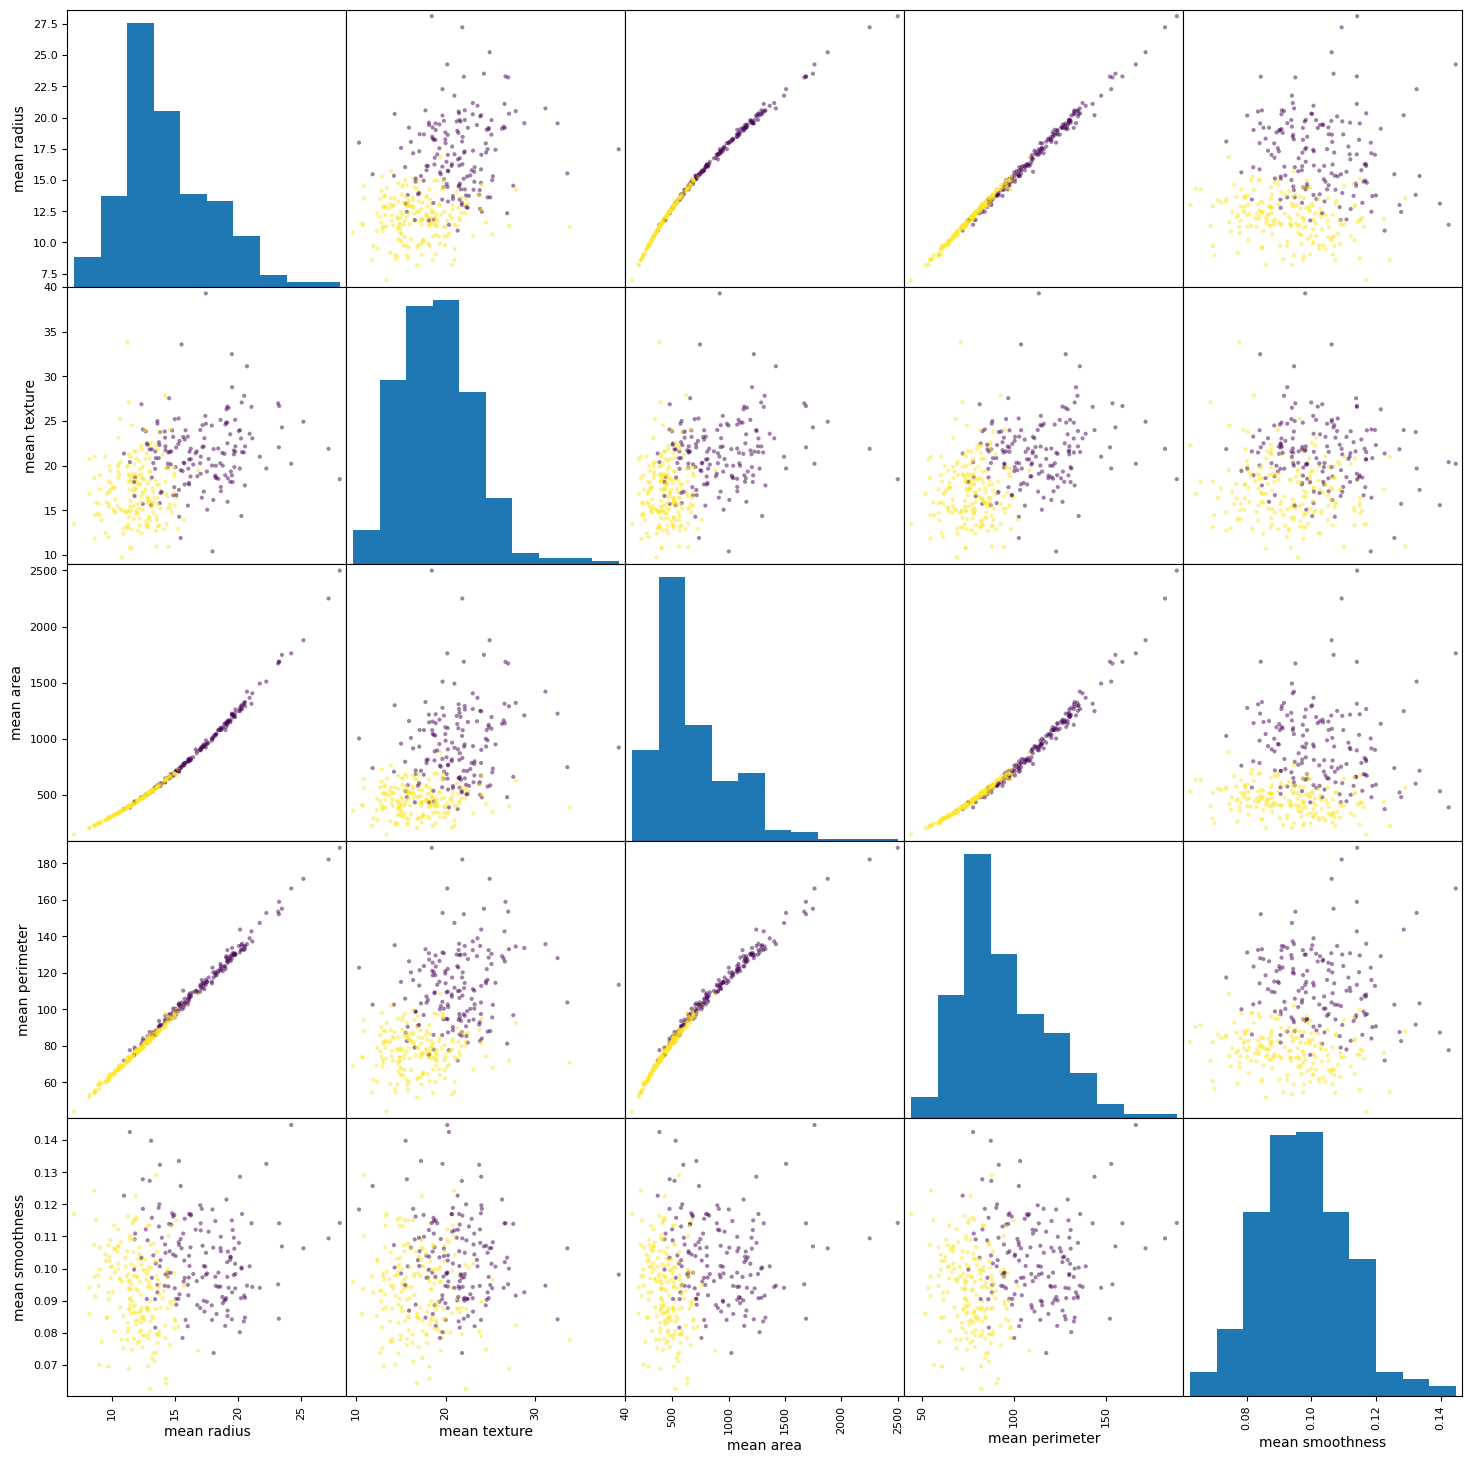

In [55]:
from pandas.plotting import scatter_matrix
attributes = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness']
scatter_matrix(breast_cancer_pd[attributes], figsize = (18,18), c=breast_cancer_pd['target'])

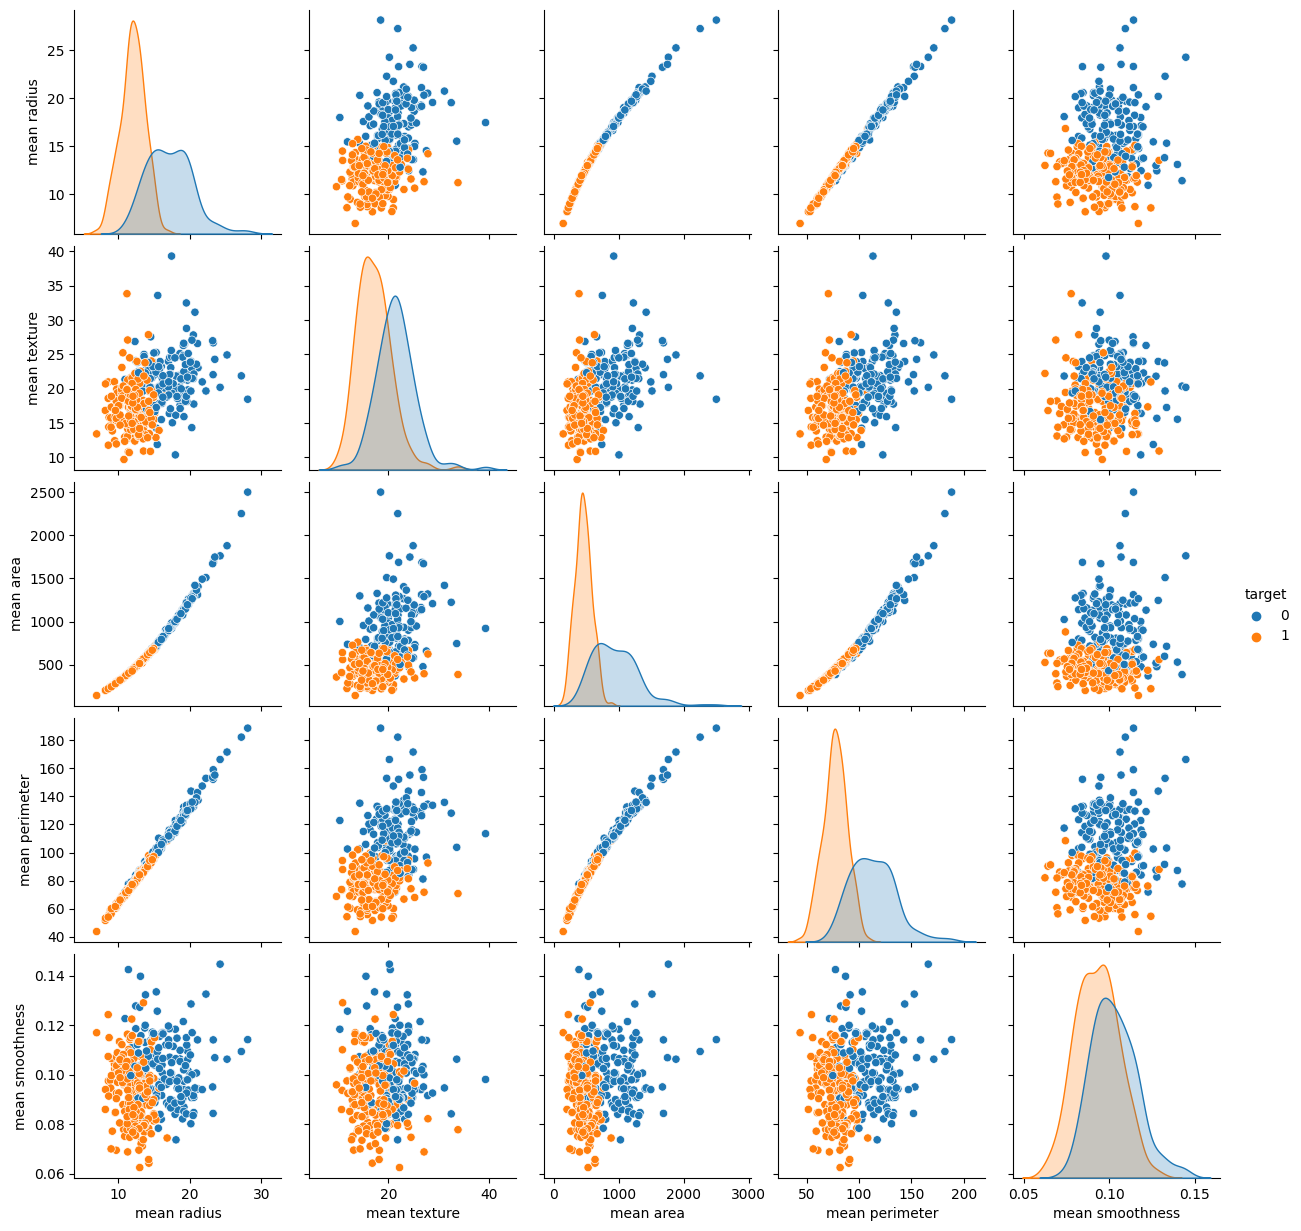

In [56]:
sns.pairplot(breast_cancer_pd, hue="target", vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

In comparing the features of radius_mean in relation to the diagnosis type we see that Benign type has the highest number of radius_mean values.

When it comes to radius_se there are two value outliers in our malignant value as most values fall below 2.0 value.

<Axes: >

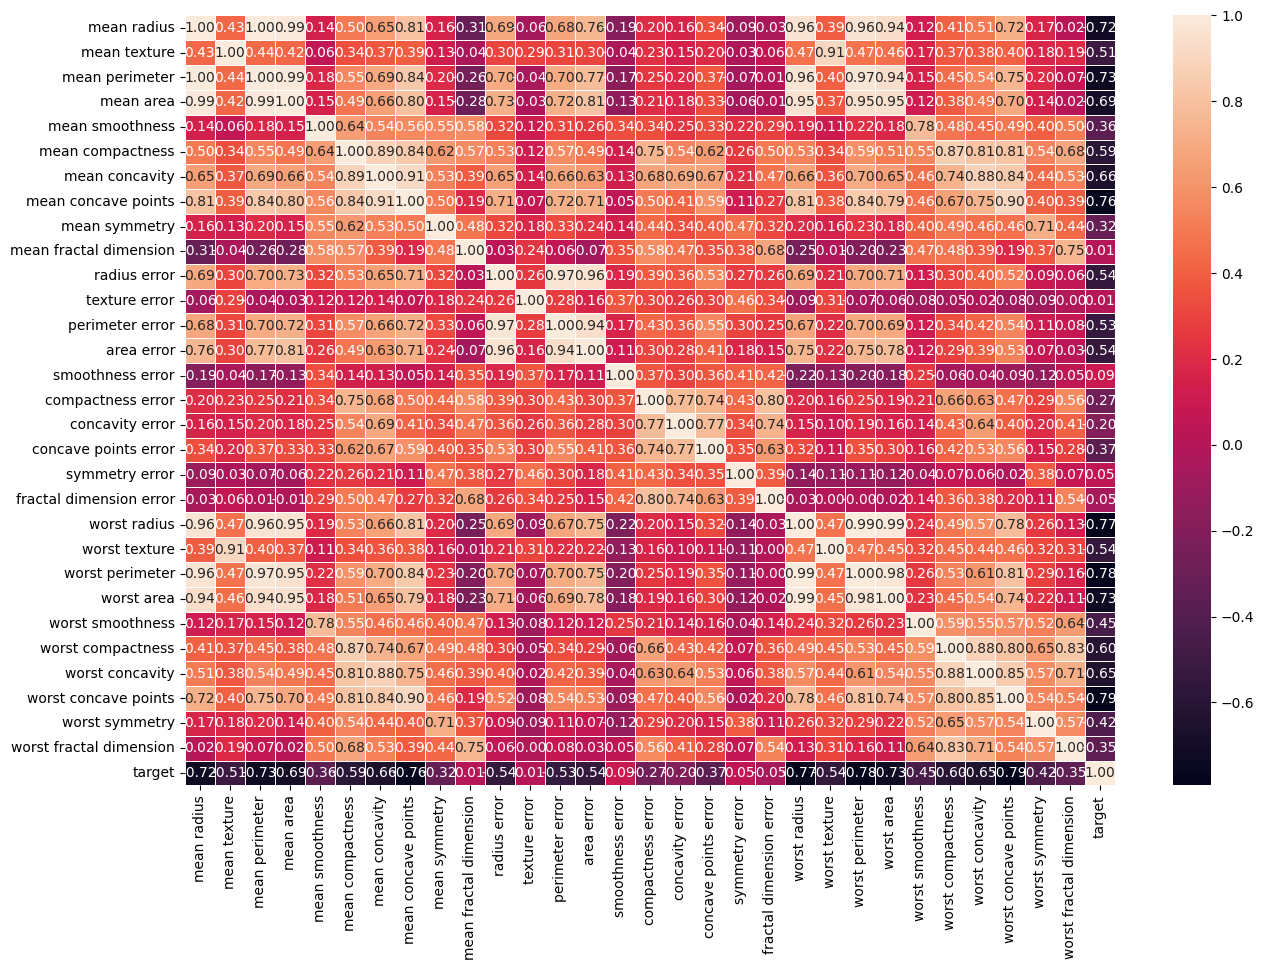

In [57]:
#Getting to view the Corrilation on our data set
plt.figure(figsize=(15,10))
sns.heatmap(breast_cancer_pd.corr(),annot=True ,fmt=".2f",annot_kws={"size":10},linewidths=.7)

**heatmap generation for data correlation **

From the cells in the matrix the darker shades of the color indicate smaller values while brighter shades correspond to larger values near to 1.

From our correlation matrix where there is a large positive near to 1.0 it indicates a strong positive correlation. Meaning when a value of one of the variables increases, the value of the other variable will increase as well.

Where there is a negative value near to -1.0 it indicates a strong negative correlation that means the value of one variable will decreases with the increasing/decreasing of the other.

While a value near to 0 whether positive or negative indicates the absence of any correlation between the two variables they are independent of each other.

# How many Benign and Malignant do we have in our dataset?

In [21]:
breast_cancer_pf['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

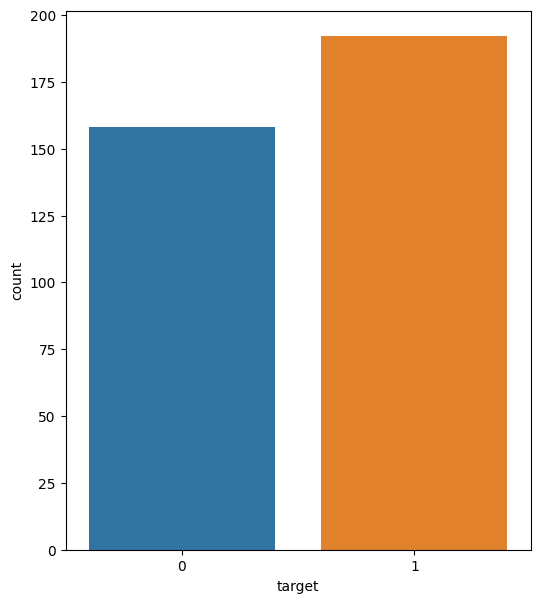

In [60]:
# Let's print out countplot to know how many samples belong to class #0 and #1
plt.figure(figsize = (6,7))
sns.countplot(breast_cancer_pd, x="target")

**Here we want to split our data where a part of it (X_train,y_train) we use it for training our model to understand our dataset and the rest (X_test,y_test)we use it in evaluating(test) how best our model performs in predicting the outcome which the metric will be in it’s accuracy to predict.**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split our preprocessed data into our features and target arrays

y = breast_cancer_pd['target'].values
# drop 'target'
X = breast_cancer_pd.drop('target', axis=1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [62]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


Compile, Train and Evaluate the Model

# **Model1**  deep neural net
CTE of model and optimisation



In [64]:
import tensorflow as tf

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=80
hidden_nodes_layer2=30
hidden_nodes_layer3=21

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                2480      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4941 (19.30 KB)
Trainable params: 4941 (19.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [66]:
# Train the model
fit_model=nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 60ms/step - loss: 0.6999 - accuracy: 0.5315 - val_loss: 0.5492 - val_accuracy: 0.8250
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4729 - accuracy: 0.8649 - val_loss: 0.3886 - val_accuracy: 0.9750
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3443 - accuracy: 0.9279 - val_loss: 0.2657 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2551 - accuracy: 0.9324 - val_loss: 0.1799 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.1953 - accuracy: 0.9414 - val_loss: 0.1241 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1567 - accuracy: 0.9505 - val_loss: 0.0900 - val_accuracy: 1.0000
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1285 - accuracy: 0.9685 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 8/100
7/7 [====

In [67]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.4233 - accuracy: 0.9205 - 66ms/epoch - 22ms/step
Loss: 0.4232883155345917, Accuracy: 0.9204545617103577


In [68]:
# Evaluate the model using the train data
model_loss, model_accuracy = nn.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 0.0020 - accuracy: 1.0000 - 34ms/epoch - 4ms/step
Loss: 0.001977204345166683, Accuracy: 1.0


## **Model returns a score of 1 . Which shows our model does a great job or train data accurcy **

In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/Model_1.h5')
files.download('/content/Model_1.h5')

# **Model2**  SVM
CTE of model and optimisation

In [30]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/Model_2.h5')
files.download('/content/Model_.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model3**
CTE of model and optimisation

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# Define the model - Using KNN

Module3 = KNeighborsClassifier(n_neighbors=1)

In [74]:
Module3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Prediction and  Evalution

In [75]:
pre_module3 =Module3.predict(X_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(confusion_matrix(y_test,pre_module3))

[[38  3]
 [ 4 43]]


In [78]:
print(classification_report(y_test,pre_module3))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.93      0.91      0.92        47

    accuracy                           0.92        88
   macro avg       0.92      0.92      0.92        88
weighted avg       0.92      0.92      0.92        88



In [82]:
pre_module3 =Module3.predict(X_train)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
 # Create and save the training classification report
print(classification_report(y_train,pre_module3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       145

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



In [96]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/Model_3.h5')
files.download('/content/Model_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>